## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [1]:
# importing Tic-Tac-Toe class from the environment file
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [0]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [0]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.
def valid_actions(state):
    valid_Actions = []
    # calling environment as env
    env = TicTacToe()
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [0]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [0]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()
    if z > epsilon:
        #Exploitation: choosing action corresponding to max q-value of current state
        action = max(Q_dict[Q_state(state)],key=Q_dict[Q_state(state)].get)   
    else:
        #Exploration: randomly choosing the action
        env = TicTacToe()
        actions = env.action_space(state)[0]
        lst_actions = list(actions)
        idx = np.random.choice(len(lst_actions))
        action = lst_actions[idx]   
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [0]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [0]:
# Defining a function to initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [
        ('x-x-x-x-x-x-x-x-x',(2, 7)),
        ('x-x-x-x-x-x-4-x-3',(3, 9)),
        ('x-x-9-x-x-x-x-x-4',(4, 5)),
        ('x-x-8-x-3-x-x-x-x',(1, 9))] 
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [0]:
# Defining a function to save the Q-dictionary and States track as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [0]:
# Defining a function for saving states track
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [91]:
# Initializing states track
initialise_tracking_states()
States_track

defaultdict(dict,
            {'x-x-8-x-3-x-x-x-x': {(1, 9): []},
             'x-x-9-x-x-x-x-x-4': {(4, 5): []},
             'x-x-x-x-x-x-4-x-3': {(3, 9): []},
             'x-x-x-x-x-x-x-x-x': {(2, 7): []}})

#### Define hyperparameters  ---write your code here

In [0]:
EPISODES = 5000001  #number of episodes
LR = 0.01           #learning rate
GAMMA = 0.80

# set the exploration probability to be very high initially. 
max_epsilon = 1.0
min_epsilon = 0.01

### Q-update loop ---write your code here

In [93]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe()      #creating an instance of the class
    curr_state = env.reset()    # Reset the environment
    terminal = False       # 'terminal' defines terminal state; 
    total_reward = 0       # total rewards zero at start of the episode 
    
    add_to_dict(curr_state) # adding valid actions of current state to Q-dictionary (if state not in Q-dictionary)
    
    if episode % 500000 == 0:
        print("Episode: {}".format(episode))
        
    while not terminal:
        # choose the action for current state & episode, based on epsilon_greedy() function
        curr_action = epsilon_greedy(curr_state, episode)
        
        # Take the action and observe the new state and reward
        next_state, reward, terminal = env.step(curr_state, curr_action)
        
        # adding valid actions of next state to Q-dictionary (if state not in Q-dictionary)
        add_to_dict(next_state)
        
        # UPDATE RULE
        if terminal:
            next_max_qvalue = 0
        else:
            best_action_next = max(Q_dict[Q_state(next_state)],key=Q_dict[Q_state(next_state)].get)   #choosing action corresponding to max q-value of next state
            next_max_qvalue = Q_dict[Q_state(next_state)][best_action_next]
        Q_dict[Q_state(curr_state)][curr_action] += LR * ((reward + (GAMMA*next_max_qvalue)) - Q_dict[Q_state(curr_state)][curr_action] )

        curr_state = next_state 
        total_reward += reward
        
    #TRACKING Q-VALUES
    save_tracking_states()   
    
end = time.time()    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')
print("Time taken in seconds: ", elapsed_time)

Episode: 0
Episode: 500000
Episode: 1000000
Episode: 1500000
Episode: 2000000
Episode: 2500000
Episode: 3000000
Episode: 3500000
Episode: 4000000
Episode: 4500000
Episode: 5000000
Time taken in seconds:  3746.0159561634064


.

#### Check the Q-dictionary

In [94]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.3186897070764652,
              (0, 3): -1.3124033261848966,
              (0, 5): -1.2958144507822689,
              (0, 7): 0.5258423664750327,
              (0, 9): -1.2777730131176228,
              (1, 1): -1.2556258286731206,
              (1, 3): 4.008069405811802,
              (1, 5): -1.306629130627521,
              (1, 7): -1.2702556198483645,
              (1, 9): -1.3011398411495227,
              (2, 1): -1.275752435426197,
              (2, 3): -1.2936183064810465,
              (2, 5): -1.2827841581228736,
              (2, 7): -0.3205449867517302,
              (2, 9): -1.2445887724945066,
              (3, 1): -1.19942787508091,
              (3, 3): -1.2902152963473212,
              (3, 5): -1.1713362789609805,
              (3, 7): -1.1944553362647792,
              (3, 9): -1.2385207793738089,
              (4, 1): -1.3437646867577033,
              (4, 3): -1.3371879901203445,
              (4, 5): 

In [95]:
len(Q_dict)

2343253

In [96]:
# Checking for one of the states to know which action our agent thinks is the best
"""
2 x x
3 5 x
6 x x
Agent need number 7 on 6th position to win which means action should be (5, 7), lets check it through Q-dictionary
"""
sample_state = '2-x-x-3-5-x-6-x-x'
best_action_next = max(Q_dict[sample_state],key=Q_dict[sample_state].get)
best_action_next

(5, 7)

#### Check the states tracked for Q-values convergence

In [2]:
# Plotting the graphs for state-action pairs tracked
with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle)  

In [3]:
# check number of items of action of each state for states_track
for key, value in States_track.items():
    for k,v in value.items():
        print(len(v))

5000001
4999067
4999148
4998363


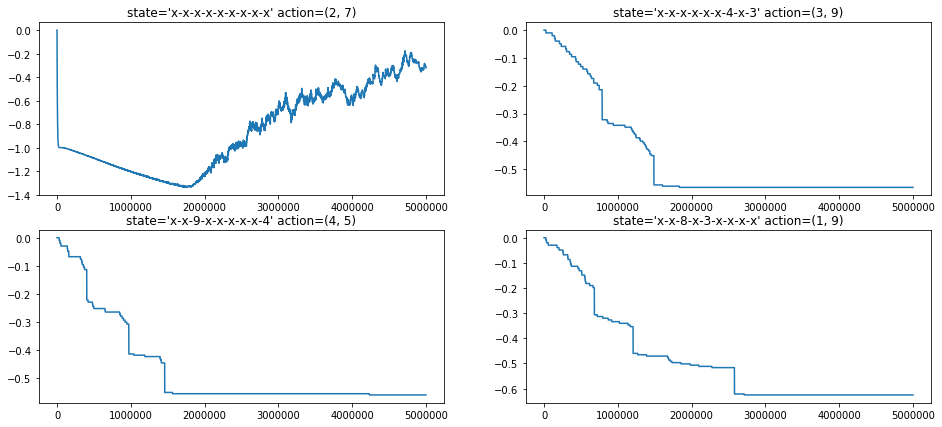

In [4]:
# Q-values vs Episodes for (state,action) pair. Episodes where (state,action)pair appeared
plt.figure(0, figsize=(16,7))
plt.subplot(221)
plt.title("state='x-x-x-x-x-x-x-x-x' action=(2, 7)")
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2, 7)]))),np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2, 7)]))
plt.subplot(222)
plt.title("state='x-x-x-x-x-x-4-x-3' action=(3, 9)")
plt.plot(np.asarray(range(0, len(States_track['x-x-x-x-x-x-4-x-3'][(3, 9)]))),np.asarray(States_track['x-x-x-x-x-x-4-x-3'][(3, 9)]))
plt.subplot(223)
plt.title("state='x-x-9-x-x-x-x-x-4' action=(4, 5)")
plt.plot(np.asarray(range(0, len(States_track['x-x-9-x-x-x-x-x-4'][(4, 5)]))),np.asarray(States_track['x-x-9-x-x-x-x-x-4'][(4, 5)]))
plt.subplot(224)
plt.title("state='x-x-8-x-3-x-x-x-x' action=(1, 9)")
plt.plot(np.asarray(range(0, len(States_track['x-x-8-x-3-x-x-x-x'][(1, 9)]))),np.asarray(States_track['x-x-8-x-3-x-x-x-x'][(1, 9)]))
plt.show()

### Epsilon - decay check

In [0]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

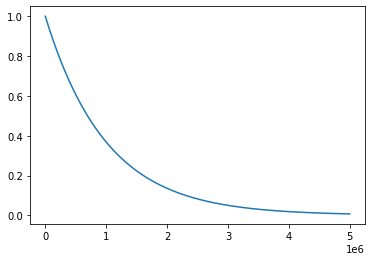

In [103]:
plt.plot(time, epsilon)
plt.show()